<a href="https://colab.research.google.com/github/srujan-b/computervision/blob/main/bitwise-operator/bitwiseOperators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Let's explore how bitwise operators like AND, NOT, and OR can be applied in computer vision by using the example of placing a Christmas hat on Elon Musk. Here are the steps to understand these bitwise operations:

In [20]:
!git clone https://github.com/srujan-b/computervision.git

fatal: destination path 'computervision' already exists and is not an empty directory.


Trump Image source : https://i.guim.co.uk/img/media/5ed54edd5d9d620487c523150e4672e3df43e442/0_197_3000_1800/master/3000.jpg?width=620&dpr=1&s=none

Trump MAGA iage source: https://www.trumpstore.com/wp-content/uploads/2021/10/TORG102-Front.jpg

Code Source : https://courses.opencv.org/courses/course-v1:OpenCV.org+OpenCV-103+2019_T1/courseware/b8a67ed2f85b4eccacf9ce85069b477c/e8ac91d2dee74d568417d1a89008035c/4?activate_block_id=block-v1%3AOpenCV.org%2BOpenCV-103%2B2019_T1%2Btype%40vertical%2Bblock%4038560019a416499d8475852414962e2b

In [21]:
# Importing necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Import the Matplotlib library for plotting
import matplotlib

# Set the default figure size for Matplotlib plots to 6.0 inches by 6.0 inches
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Set the default colormap for images to grayscale
matplotlib.rcParams['image.cmap'] = 'gray'


##Loading the images

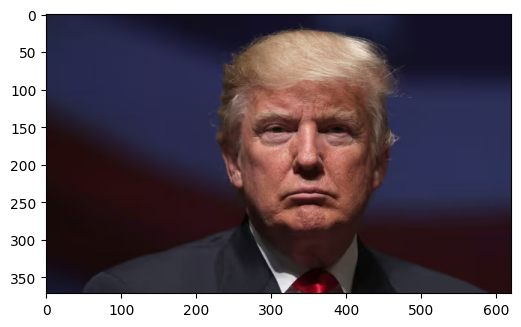

In [23]:
trumpImagePath = "/content/computervision/bitwise-operator/trump.jpg"
trumpImage = cv2.imread(trumpImagePath)
plt.imshow(trumpImage[...,::-1])

# Make a copy
trumpImageWithCapBitwise = trumpImage.copy()

(130, 280, 3)


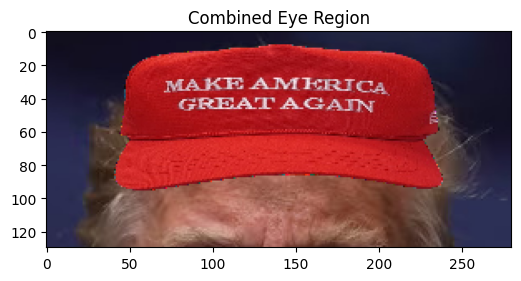

In [38]:
capROI= trumpImageWithCapBitwise[10:140,210:490]
plt.imshow(np.uint8(capROI)[:,:,::-1]);plt.title("Combined Eye Region");

print(capROI.shape)

image Dimension =(130, 280, 4)


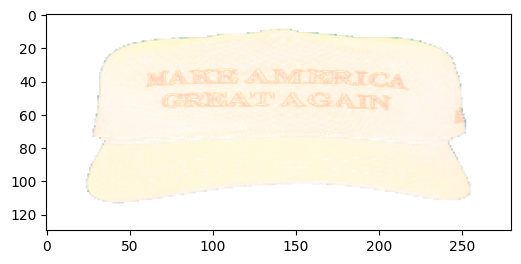

In [39]:
trumpMAGACapPath = "/content/computervision/bitwise-operator/trumpMAGA.png"
magaPNG = cv2.imread(trumpMAGACapPath,-1)


magaPNG = cv2.resize(magaPNG,(280,130))
print("image Dimension ={}".format(magaPNG.shape))
plt.imshow(magaPNG[...,::-1])

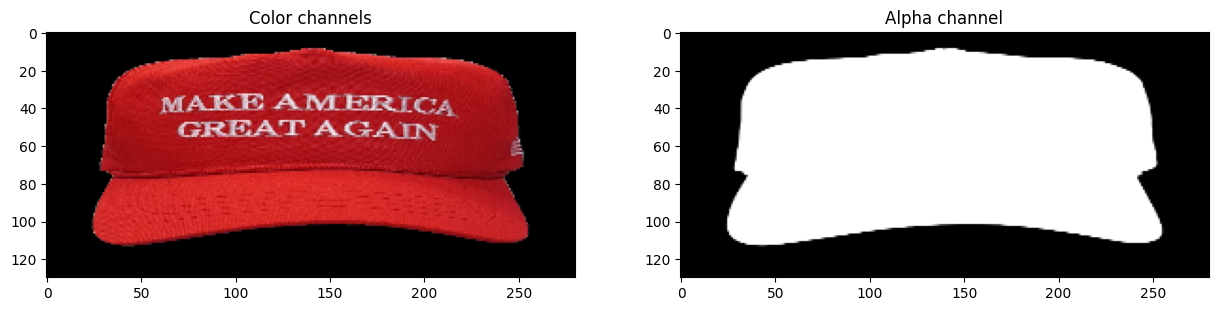

In [40]:
# Separate the Color and alpha channels
magaBGR = magaPNG[:,:,0:3]
magaMask1 = magaPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(magaBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(magaMask1,cmap='gray');plt.title('Alpha channel');

In [41]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
magaMask = cv2.merge((magaMask1,magaMask1,magaMask1))

In [42]:
# Use the mask to create the masked eye region
head = cv2.bitwise_and(capROI,cv2.bitwise_not(magaMask))

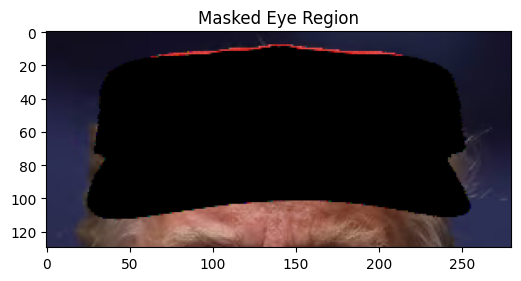

In [43]:
plt.imshow(head[:,:,::-1]);plt.title("Masked Eye Region");

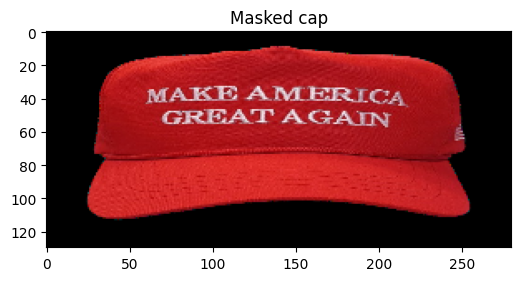

In [44]:
# Use the mask to create the masked sunglass region
trumpmaga = cv2.bitwise_and(magaBGR,magaMask)

plt.imshow(trumpmaga[:,:,::-1]);plt.title("Masked cap");

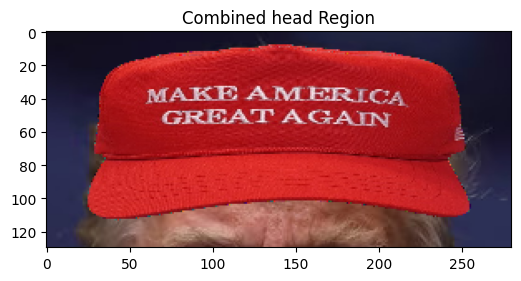

In [45]:
# Combine the Sunglass in the Eye Region to get the augmented image
headRoiFinal = cv2.bitwise_or(head, trumpmaga)
plt.imshow(np.uint8(headRoiFinal)[:,:,::-1]);plt.title("Combined head Region");

In [46]:
trumpImageWithCapBitwise[10:140,210:490] = headRoiFinal

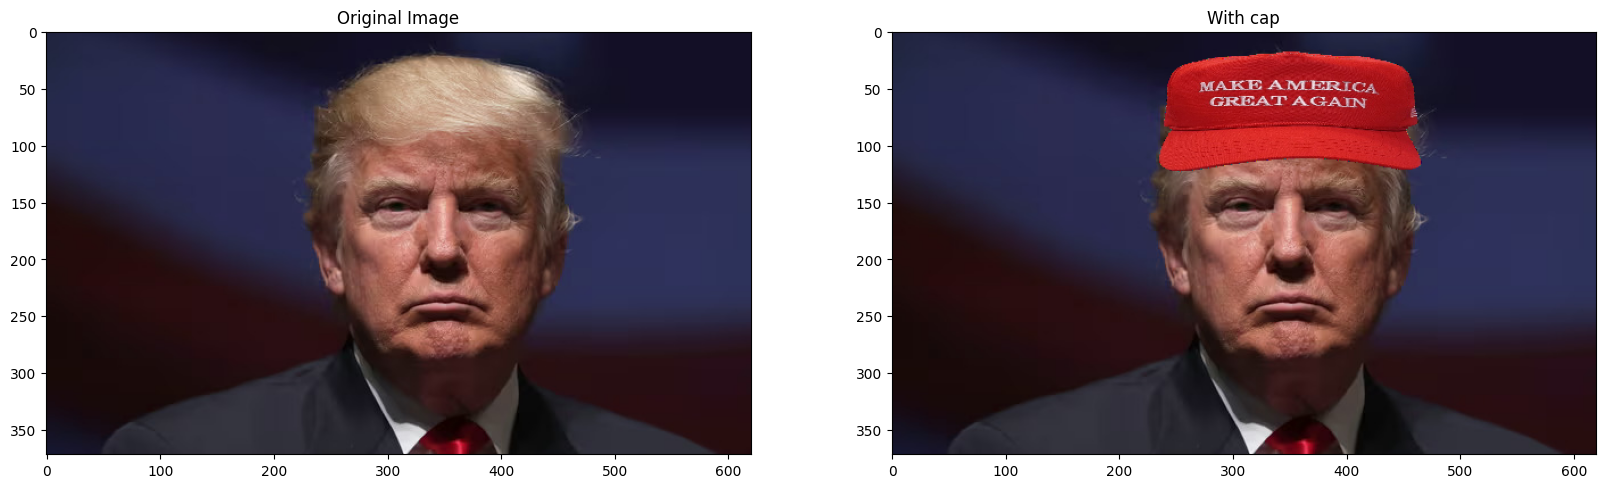

In [47]:
# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(trumpImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(trumpImageWithCapBitwise[:,:,::-1]);plt.title("With cap");